# Clustering

## Step 0: Imports & Definitions

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.cluster import KMeans, DBSCAN
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
CCN = 0 # Define CCN, which is the Current Cluster Number.

## Step 1: Data Generation

Define 3 groups of plants.

In [3]:
NUM_INPUTS = 50
PLANT_A_AVG_HEIGHT = 20.0
PLANT_A_AVG_WIDTH = 20.0
PLANT_B_AVG_HEIGHT = 30.0
PLANT_B_AVG_WIDTH = 30.0
PLANT_C_AVG_HEIGHT = 40.0
PLANT_C_AVG_WIDTH = 40.0

plantA_heights = numpy.random.normal(loc=PLANT_A_AVG_HEIGHT, size=NUM_INPUTS)
plantA_widths = numpy.random.normal(loc=PLANT_A_AVG_WIDTH, size=NUM_INPUTS)

plantB_heights = numpy.random.normal(loc=PLANT_B_AVG_HEIGHT, size=NUM_INPUTS)
plantB_widths = numpy.random.normal(loc=PLANT_B_AVG_WIDTH, size=NUM_INPUTS)

plantC_heights = numpy.random.normal(loc=PLANT_C_AVG_HEIGHT, size=NUM_INPUTS)
plantC_widths = numpy.random.normal(loc=PLANT_C_AVG_WIDTH, size=NUM_INPUTS)

plant_inputs = list(zip(numpy.append(plantA_heights, plantB_heights), numpy.append(plantA_widths, plantB_widths)))
plantC_inputs = list(zip(plantC_heights, plantC_widths))
plant_inputs = list(numpy.append(plant_inputs, plantC_inputs))

plant_heights = list(plantA_heights) + list(plantB_heights) + list(plantC_heights)
plant_widths = list(plantA_widths) + list(plantB_widths) + list(plantC_widths)

### Put into a dataframe.

In [4]:
dataFrame = pd.DataFrame(data=[plant_heights, plant_widths]).transpose()

In [5]:
dataFrame[dataFrame.shape[1]] = "alone"

In [6]:
dataFrame[dataFrame.shape[1]] = "0"

In [7]:
numColms = dataFrame.shape[1]

In [8]:
dataFrame.shape[0]

150

In [9]:
dataFrame.head()

,0,1,2,3
0,19.659620,18.800996,alone,0
1,19.664889,20.789687,alone,0
2,19.315482,19.425965,alone,0
3,21.630559,21.181043,alone,0
4,18.354516,19.368572,alone,0


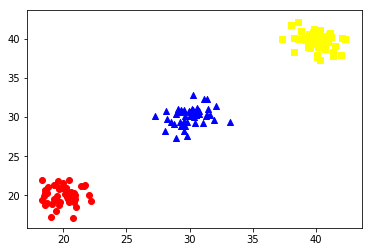

In [10]:
################################################################################
# PLOT --> So we have a graph to go off of.
################################################################################

# put the generated points on the graph
matplotlib.pyplot.scatter(plantA_heights, plantA_widths, c="red", marker="o")
matplotlib.pyplot.scatter(plantB_heights, plantB_widths, c="blue", marker="^")
matplotlib.pyplot.scatter(plantC_heights, plantC_widths, c="yellow", marker="s")

matplotlib.pyplot.show()

## Step 2: Defining our DBScan Algorithim

In [11]:
def getDist(row1, row2): # Gets the distance between two points.
    return np.linalg.norm(row1.as_matrix()[:1]-row2.as_matrix()[:1])

In [12]:
def rowDistances(row, df): # Finds the distances between one point and every other point .
    return df.apply(getDist, 1, row2=row)

In [13]:
def clusterFromPoint(df, epsilon, minPoints, pointIndex): # Cluster if at least minPoints fall within epsilon of the main point.
    df.iloc[pointIndex, numColms-1] = 1 # Set the clustering point to having been clustered.
    distances = rowDistances(df.iloc[pointIndex], df).tolist() # Get the distances from that point.
    posD = [] # Initialize a list of indices that are within epsilon.
    for d in distances: # For every distance
        if(d <= epsilon): # If that point is within epsilon of the main point.
            posD.append(distances.index(d)) # Add the index of the new point to our list.
    if(len(posD) >= minPoints): # If there are enough points that fall within that distance.
        for d in posD: # Cycle through every every nearby indice.
            df.iloc[pointIndex, numColms-2] = CCN # Add the first point to the cluster.
            df.iloc[d, numColms-2] = CCN # Set the nearby indice to the current cluster.
            if df.iloc[d, numColms-1] == '0': # If the nearby indice hasn't been clustered yet.
                clusterFromPoint(df, epsilon, minPoints, d) # Cluster nearby points
    return df # Return a clustered dataframe

In [14]:
def dbscan(df, epsilon, minPoints): # The main DBScan algorithim
    global CCN # Have permission to access CCN
    currentIndex = np.random.randint(0, dataFrame.shape[0]-1) # Set the current index to a random integer.
    nums = range(0, df.shape[0]) # Make a list of every index.
    while len(df[df[numColms-1] == "0"]) > 0: # While there are still unclustered points.
        indexNum = np.random.randint(0, len(df[df[numColms-1] == "0"])) # Randomly choose an unclustered index.
        currentIndex = df.index.get_loc(df[df[numColms-1] == "0"].iloc[indexNum].name) # Set the current index to an index within the full range of points.
        df = clusterFromPoint(df, epsilon, minPoints, currentIndex) # Set the dataframe after being clustered.
        if not df.iloc[currentIndex, numColms-2] == 'alone': # If the clustered dataframe isn't alone.
            CCN += 1 # Move on to the next cluster number.
    return df # Return a clustered dataframe.

## Step 3: Using our algorithim

In [15]:
df = dbscan(dataFrame, 1, 4) # Run the algorithim on our points

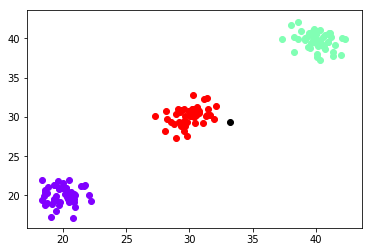

In [16]:
colors = iter(cm.rainbow(np.linspace(0, 1, CCN))) # Define a list of different colors to color our clusters.
for i in range(-1, CCN):
    if i == -1: # Scatter the alone points
        xs = df[df[numColms-2] == "alone"][0]
        ys = df[df[numColms-2] == "alone"][1]
        matplotlib.pyplot.scatter(xs, ys, color="black")
    else: # Scatter the clustered points
        xs = df[df[numColms-2] == i][0]
        ys = df[df[numColms-2] == i][1]
        matplotlib.pyplot.scatter(xs, ys, color=next(colors))
matplotlib.pyplot.show() # Show the scatterplot